In [2]:
import os
import pandas as pd

paths = {
    'pt': '/mnt/c/Users/sabri/Documents/github/thesis/artifacts/results/hardware_stats_pt.csv',
    'onnx': '/mnt/c/Users/sabri/Documents/github/thesis/artifacts/results/hardware_stats_onnx.csv',
    'tflite16': '/mnt/c/Users/sabri/Documents/github/thesis/artifacts/results/hardware_stats_tflite16.csv',
}

In [3]:
# values = pd.read_csv(paths['pt'])
# values['model'] = 'pt'

In [4]:
hardware_util_list =[]

for key, value in paths.items():
    temp = pd.read_csv(value)
    temp['model'] = key
    temp['seconds'] = temp.index
    hardware_util_list.append(temp)

hardware_util = pd.concat(hardware_util_list)


In [39]:
hardware_util.to_csv('hardware_stats_all.csv', index=False)

In [85]:
hardware_util_filtered = hardware_util[hardware_util.seconds.between(10, 400)]

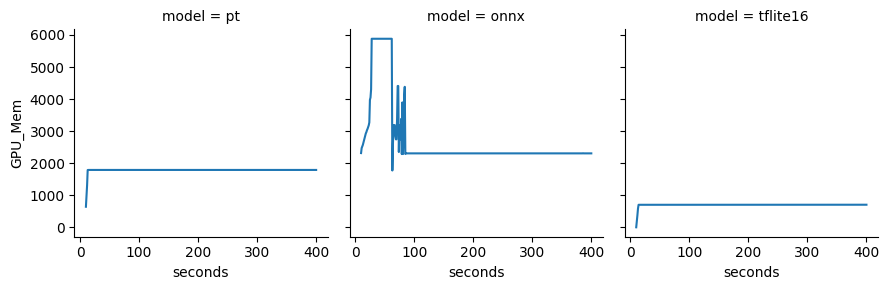

In [86]:
# Create the facet grid plot
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of the models you want to plot
model_order = ['pt', 'onnx', 'tflite16']

# Define the order of the variables you want to plot
var_order = ['CPU', 'Memory', 'GPU_Util', 'GPU_Mem', 'GPU_Mem_Free', 'Power']

g = sns.FacetGrid(hardware_util_filtered, col='model', col_order=model_order)
g.map(plt.plot, 'seconds', 'GPU_Mem')
plt.show()

<Axes: xlabel='seconds', ylabel='Memory'>

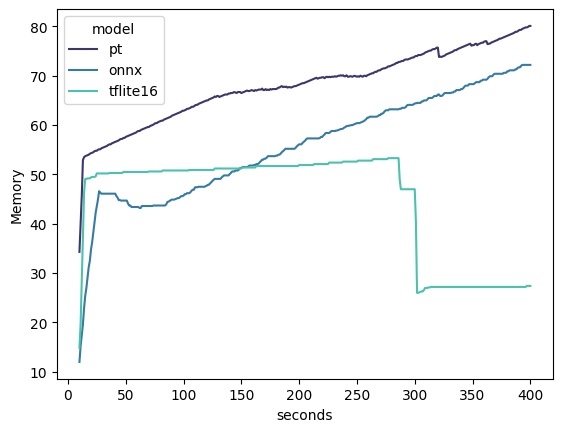

In [87]:
sns.lineplot(data=hardware_util_filtered, x="seconds", y="Memory", hue="model", palette="mako")

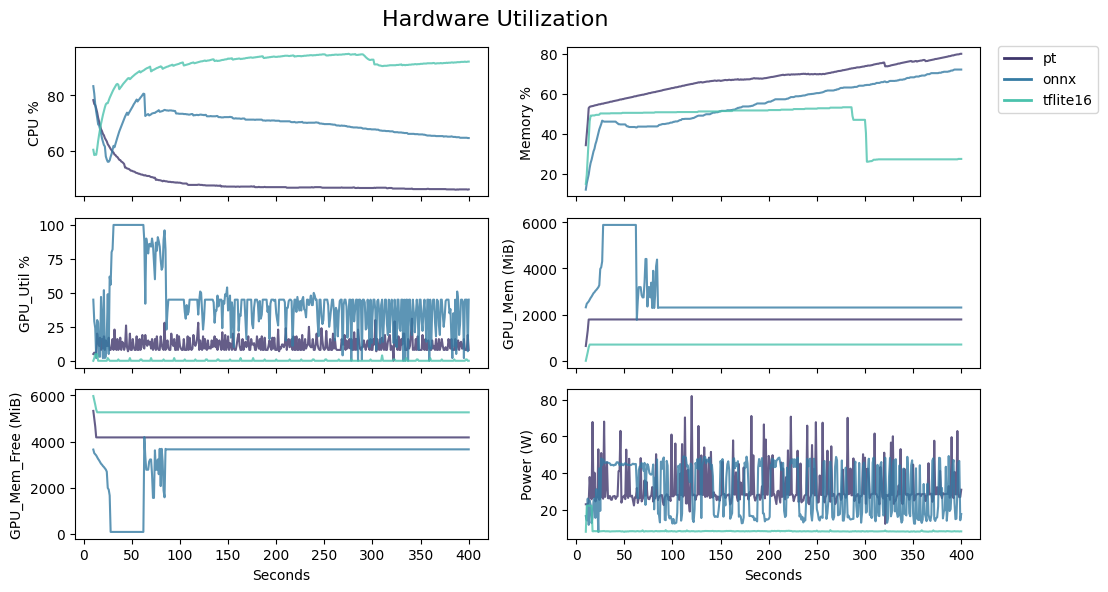

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming your data is already in a dataframe called 'df'

# Reset the index to avoid duplicate labels
df = hardware_util_filtered.reset_index(drop=True)

metrics = ['CPU', 'Memory', 'GPU_Util', 'GPU_Mem', 'GPU_Mem_Free', 'Power']
metrics_units = ['%', '%', '%', '(MiB)', '(MiB)', '(W)']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 6), sharex=True);
axes = axes.flatten()

# Create a line plot for each metric using seaborn and set their titles
for idx, metric in enumerate(metrics):
    g = sns.lineplot(data=df, x='seconds', y=metric, hue='model', ax=axes[idx], palette="mako", legend=False, alpha=0.8)
    axes[idx].set_xlabel('Seconds')
    axes[idx].set_ylabel(f"{metric} {metrics_units[idx]}")

# handles, labels = g.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.11, 0.93))

# Create a custom legend with labels and colors
legend_labels = list(df.model.unique())
legend_colors = sns.color_palette('mako', n_colors=3)
legend_elements = [Line2D([0], [0], color=color, lw=2) for color in legend_colors]
fig.legend(handles=legend_elements, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.11, 0.93))

# Set a tight layout and show the figure
fig.suptitle("Hardware Utilization", fontsize=16)
plt.tight_layout()
plt.show()


In [89]:
df[df.CPU > 100]

,timestamp,CPU,Memory,GPU_Util,GPU_Mem,GPU_Mem_Free,Power,model,seconds
